In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Loading data from file

In [1]:
DATA_PATH = '../../data/processed'

def load_data(year, img_h=1400, img_w=1400):

    X = []
    y = []

    data_dir = os.path.join(DATA_PATH, str(year))
    frames_dir = os.path.join(data_dir, 'frames')
    masks_dir = os.path.join(data_dir, 'masks')

    for file in sorted(os.listdir(frames_dir)):
        if file.startswith('R'):
            filename = file.split('.')[0]

            frame = np.load(os.path.join(frames_dir, filename + '.npy'))
            mask = np.load(os.path.join(masks_dir, filename + '_labels.npy'))
            X.append(frame[:img_h, :img_w, :])
            y.append(mask[:img_h, :img_w])

    X = np.array(X)
    y = np.array(y)

    return X, y

## Data preprocessing

In [4]:
def reshape_data(X, y):
    """ Reshapes data so that columns are spectral bands and rows are pixels """

    X_reshaped = X.reshape(-1, X.shape[-1])
    y_reshaped = y.reshape(-1)

    return X_reshaped, y_reshaped

def standardizer(X):
    """ Standardizes features by removing mean and scaling to unit variance  """
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled

## Load model

In [20]:
MODEL_PATH = '../../models'

def load_model(filename):
    """ Loads trained model from file  """

    with open(os.path.join(MODEL_PATH, filename), 'rb') as file:
        pickle_model = pickle.load(file)
        
    return pickle_model

## Visualization

In [94]:
def plot_image(image, factor=1):
    """ Plot RGB spectral bands """    
    
    if np.issubdtype(image.dtype, np.floating):
        plt.imshow(np.minimum(image * factor, 1))
    else:
        plt.imshow(image)
        
def plot_labels(labels):
    """ Plot binary labels """
    
    plt.imshow(labels)

## Metrics

In [95]:
def intersection_over_union(confusion_matrix):
    """ Intersection-over-union metric for image segmentation """
    
    tn, fp, fn, tp = confusion_matrix.ravel()
    iou = tp / (tp + fn + fp)
    return iou

def print_metrics(y_true, y_pred):
    """ Print classifcation metrics """
    
    y_true_flat = y_true.flatten()
    y_pred_flat = y_pred.flatten()
    
    cm = confusion_matrix(y_true_flat, y_pred_flat)

    print('Accuracy: %.2f' % accuracy_score(y_true_flat, y_pred_flat))
    print('Intersection-over-Union: %.2f' % intersection_over_union(cm))
    print('Confusion Matrix: \n', cm)
    print('Classification report:\n', classification_report(y_true_flat, y_pred_flat))

## Testing Logistic Regression Model on 2018 Data

In [96]:
X, y = load_data(2018)

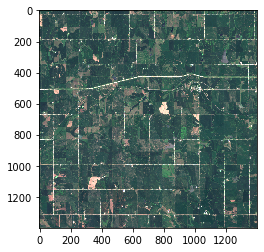

In [97]:
# Visualizing single sample & labels
X_sample = X[0]
y_sample = y[0]

plot_image(X_sample[:,:,[3,2,1]], 7)

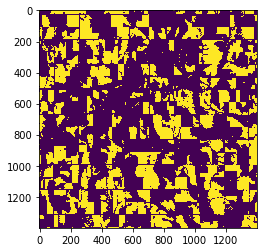

In [98]:
plot_labels(y_sample)

## Loading model and making predictions

In [99]:
# loading trained model
log_reg = load_model('log_reg.pkl')

# preprocessing
X, y = reshape_data(X, y)
X_scaled = standardizer(X)

# making predictions
y_pred = log_reg.predict(X_scaled)

In [110]:
print_metrics(y, y_pred)

Accuracy: 0.91
Intersection-over-Union: 0.72
Confusion Matrix: 
 [[29965557  2062164]
 [ 2154159 10898120]]
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93  32027721
           1       0.84      0.83      0.84  13052279

    accuracy                           0.91  45080000
   macro avg       0.89      0.89      0.89  45080000
weighted avg       0.91      0.91      0.91  45080000



## Visualizing predictions

In [111]:
y_pred = y_pred.reshape(23, 1400, 1400)
y = y.reshape(23, 1400, 1400)

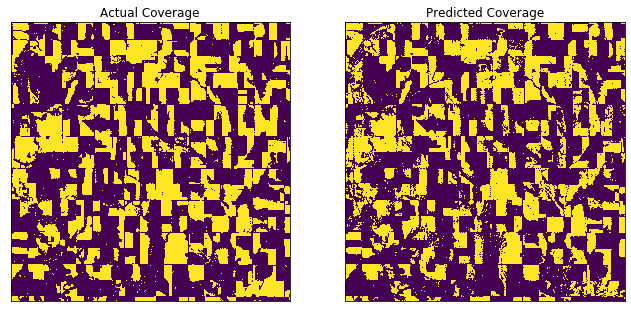

In [113]:
f = plt.figure(figsize=(11,6))

plt.subplot(121)
plt.title('Actual Coverage')
plt.xticks([])
plt.yticks([])
plt.imshow(y[1])

plt.subplot(122)
plt.title('Predicted Coverage')
plt.xticks([])
plt.yticks([])
plt.imshow(y_pred[1])

In [114]:
print_metrics(y[1], y_pred[1])

Accuracy: 0.91
Intersection-over-Union: 0.79
Confusion Matrix: 
 [[1109509   66778]
 [ 114963  668750]]
Classification report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92   1176287
           1       0.91      0.85      0.88    783713

    accuracy                           0.91   1960000
   macro avg       0.91      0.90      0.90   1960000
weighted avg       0.91      0.91      0.91   1960000



## A closer look

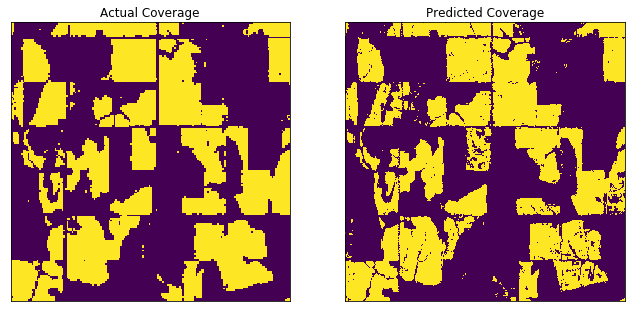

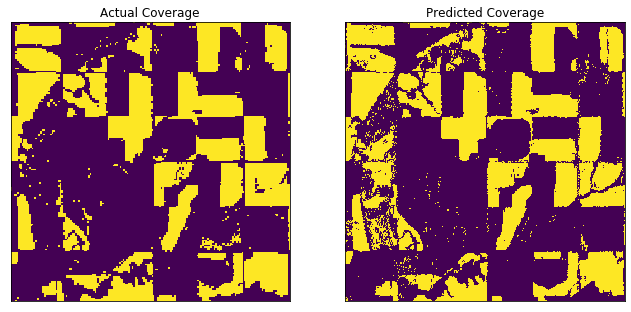

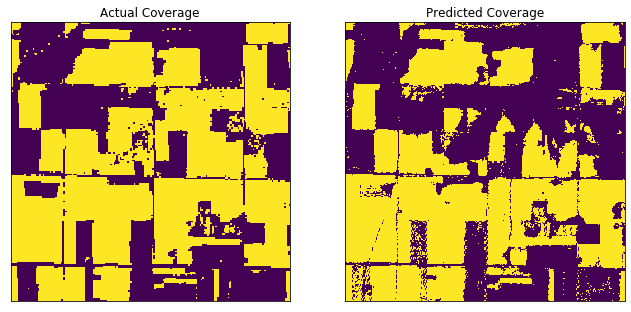

In [118]:
for i in range(3):
    
    f = plt.figure(figsize=(11,6))

    plt.subplot(121)
    plt.title('Actual Coverage')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(y[i][:500,:500])

    plt.subplot(122)
    plt.title('Predicted Coverage')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(y_pred[i][:500,:500])